In [12]:
import numpy as np

def sigmoid(z):
    """
    Calcula la función sigmoide.
    """
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    """
    Calcula la función de costo (entropía cruzada binaria).
    """
    m = X.shape[0]
    z = np.dot(X, w) + b
    a = sigmoid(z)
    cost = (-1/m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    return cost

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Implementa el gradiente descendente para la optimización.
    """
    m = X.shape[0]
    w = w_in
    b = b_in

    for i in range(num_iters):
        z = np.dot(X, w) + b
        a = sigmoid(z)

        dw = (1/m) * np.dot(X.T, (a - y))
        db = (1/m) * np.sum(a - y)

        w = w - alpha * dw
        b = b - alpha * db

    return w, b

def predict(X, w, b):
    """
    Realiza predicciones utilizando el modelo entrenado.
    """
    z = np.dot(X, w) + b
    predictions = sigmoid(z)
    return (predictions >= 0.5).astype(int)


# Notebook de Regresión Logística con Gradiente Descendente

Este notebook presenta una implementación desde cero de la Regresión Logística, optimizada utilizando el algoritmo de Gradiente Descendente. Incluye un ejemplo aplicado a un problema del mundo real, la evaluación del modelo con diversas métricas y visualizaciones, y explicaciones detalladas de cada componente.

## 1. Introducción a la Regresión Logística

La Regresión Logística es un algoritmo de clasificación binaria fundamental en el aprendizaje automático. A pesar de su nombre, es un modelo para la clasificación, no para la regresión. Su objetivo es modelar la probabilidad de que una instancia de entrada pertenezca a una clase particular (por ejemplo, 0 o 1).

La función central de la regresión logística es la **función sigmoide** (también conocida como función logística), que mapea cualquier valor real a un rango entre 0 y 1. Esta salida puede interpretarse como una probabilidad.

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Donde $z$ es una combinación lineal de las características de entrada y los pesos del modelo: $z = w^T x + b$.

## 2. Optimización con Gradiente Descendente

Para encontrar los mejores pesos ($w$) y el sesgo ($b$) que minimicen el error de predicción, utilizamos el algoritmo de **Gradiente Descendente**. Este es un algoritmo de optimización iterativo que ajusta los parámetros del modelo en la dirección opuesta al gradiente de la función de costo.

La **función de costo** utilizada para la regresión logística es la entropía cruzada binaria (Binary Cross-Entropy), que penaliza las predicciones incorrectas.

$$ J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(a^{(i)}) + (1 - y^{(i)}) \log(1 - a^{(i)}) ] $$

Donde $m$ es el número de ejemplos de entrenamiento, $y^{(i)}$ es la etiqueta real, y $a^{(i)}$ es la probabilidad predicha por el modelo para el i-ésimo ejemplo.

Las reglas de actualización para el gradiente descendente son:

$$ w := w - \alpha \frac{\partial J}{\partial w} $$
$$ b := b - \alpha \frac{\partial J}{\partial b} $$

Donde $\alpha$ es la tasa de aprendizaje, y las derivadas parciales son:

$$ \frac{\partial J}{\partial w} = \frac{1}{m} X^T (A - Y) $$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (a^{(i)} - y^{(i)}) $$

## 3. Implementación del Modelo (Desde Cero)

A continuación, se presenta la implementación de las funciones clave de la regresión logística y el gradiente descendente en Python. Estas funciones se encuentran en el archivo `logistic_regression.py`.



In [13]:
import numpy as np

def sigmoid(z):
    """
    Calcula la función sigmoide.
    """
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    """
    Calcula la función de costo (entropía cruzada binaria).
    """
    m = X.shape[0]
    z = np.dot(X, w) + b
    a = sigmoid(z)
    cost = (-1/m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    return cost

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Implementa el gradiente descendente para la optimización.
    """
    m = X.shape[0]
    w = w_in
    b = b_in

    for i in range(num_iters):
        z = np.dot(X, w) + b
        a = sigmoid(z)

        dw = (1/m) * np.dot(X.T, (a - y))
        db = (1/m) * np.sum(a - y)

        w = w - alpha * dw
        b = b - alpha * db

    return w, b

def predict(X, w, b):
    """
    Realiza predicciones utilizando el modelo entrenado.
    """
    z = np.dot(X, w) + b
    predictions = sigmoid(z)
    return (predictions >= 0.5).astype(int)



## 4. Ejemplo Aplicado: Predicción de Admisión Universitaria

Para ilustrar la aplicación de la regresión logística, utilizaremos un conjunto de datos sintético que simula la predicción de la admisión de estudiantes a una universidad. Las características de entrada serán las calificaciones de dos exámenes, y la variable objetivo será si el estudiante fue admitido (1) o no (0).

### 4.1. Generación y Preprocesamiento de Datos

Generamos 200 ejemplos de estudiantes con calificaciones aleatorias en dos exámenes. Luego, dividimos los datos en conjuntos de entrenamiento y prueba y escalamos las características para asegurar que el gradiente descendente converja eficientemente.



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Importar las funciones de regresión logística implementadas
# from logistic_regression import sigmoid, compute_cost, gradient_descent, predict

# --- Generación de Datos Sintéticos para un Ejemplo del Mundo Real ---
# Simularemos un problema de clasificación binaria, por ejemplo, predecir si un estudiante
# será admitido en una universidad basándose en sus calificaciones en dos exámenes.

np.random.seed(42)

# Número de estudiantes
m = 200

# Calificaciones del Examen 1 (X1) y Examen 2 (X2)
X1 = np.random.normal(loc=60, scale=15, size=m) # Calificaciones del Examen 1
X2 = np.random.normal(loc=70, scale=10, size=m) # Calificaciones del Examen 2

# Probabilidad de admisión (basada en una combinación lineal de las calificaciones)
# Usamos una función sigmoide para convertir la combinación lineal en una probabilidad
# y luego generamos la admisión (0 o 1) basada en esta probabilidad.

# Coeficientes 'reales' para la generación de datos
true_w1 = 0.1
true_w2 = 0.08
true_b = -10

# Calcular la probabilidad de admisión
prob_admission = sigmoid(true_w1 * X1 + true_w2 * X2 + true_b)

# Generar la variable de admisión (y) basada en la probabilidad
y = (prob_admission > np.random.rand(m)).astype(int)

# Combinar las características en una matriz X
X = np.vstack((X1, X2)).T

print("Datos sintéticos generados:")
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Número de admisiones (clase 1): {np.sum(y)}")
print(f"Número de no admisiones (clase 0): {m - np.sum(y)}")

# --- Preprocesamiento de Datos ---
# Escalado de características y división en conjuntos de entrenamiento y prueba

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDatos divididos en entrenamiento y prueba:")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Escalar el conjunto de datos completo para la visualización de los límites de decisión
X_scaled = scaler.fit_transform(X)

print("\nCaracterísticas escaladas.")

Datos sintéticos generados:
Forma de X: (200, 2)
Forma de y: (200,)
Número de admisiones (clase 1): 153
Número de no admisiones (clase 0): 47

Datos divididos en entrenamiento y prueba:
Forma de X_train: (160, 2)
Forma de X_test: (40, 2)
Forma de y_train: (160,)
Forma de y_test: (40,)

Características escaladas.



### 4.2. Entrenamiento del Modelo

Inicializamos los pesos y el sesgo, y luego entrenamos el modelo utilizando la función `gradient_descent` con una tasa de aprendizaje y un número de iteraciones definidos.



In [15]:
# Inicializar pesos y sesgo
n_features = X_train_scaled.shape[1]
w_initial = np.zeros(n_features)
b_initial = 0.0

# Hiperparámetros del gradiente descendente
learning_rate = 0.1
num_iterations = 1000

print("\nEntrenando el modelo de regresión logística...")
w, b = gradient_descent(X_train_scaled, y_train, w_initial, b_initial, learning_rate, num_iterations)

print("\nEntrenamiento completado.")
print(f"Pesos finales (w): {w}")
print(f"Sesgo final (b): {b}")



Entrenando el modelo de regresión logística...

Entrenamiento completado.
Pesos finales (w): [1.14046751 0.94944818]
Sesgo final (b): 1.650141381969918



## 5. Evaluación del Modelo y Resultados

Evaluamos el rendimiento del modelo en los conjuntos de entrenamiento y prueba utilizando métricas comunes de clasificación como Accuracy, Precision, Recall, F1-Score y la Matriz de Confusión. También visualizamos la Curva ROC y los Límites de Decisión.

### 5.1. Métricas de Evaluación



In [16]:
y_pred_train = predict(X_train_scaled, w, b)
y_pred_test = predict(X_test_scaled, w, b)

print("\nMétricas de evaluación en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_train):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_train):.4f}")
print(f"F1-Score: {f1_score(y_train, y_pred_train):.4f}")
print("Matriz de Confusión:\n", confusion_matrix(y_train, y_pred_train))

print("\nMétricas de evaluación en el conjunto de prueba:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_test):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_test):.4f}")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_test))



Métricas de evaluación en el conjunto de entrenamiento:
Accuracy: 0.8125
Precision: 0.8538
Recall: 0.9098
F1-Score: 0.8810
Matriz de Confusión:
 [[ 19  19]
 [ 11 111]]

Métricas de evaluación en el conjunto de prueba:
Accuracy: 0.7500
Precision: 0.7838
Recall: 0.9355
F1-Score: 0.8529
Matriz de Confusión:
 [[ 1  8]
 [ 2 29]]



**Resultados de la ejecución:**

Datos sintéticos generados:
Forma de X: (200, 2)
Forma de y: (200,)
Número de admisiones (clase 1): 153
Número de no admisiones (clase 0): 47

Datos divididos en entrenamiento y prueba:
Forma de X_train: (160, 2)
Forma de X_test: (40, 2)
Forma de y_train: (160,)
Forma de y_test: (40,)

Características escaladas.

Entrenando el modelo de regresión logística...

Entrenamiento completado.
Pesos finales (w): [1.14046751 0.94944818]
Sesgo final (b): 1.650141381969918

Métricas de evaluación en el conjunto de entrenamiento:
Accuracy: 0.8125
Precision: 0.8538
Recall: 0.9098
F1-Score: 0.8810
Matriz de Confusión:
 [[ 19  19]
 [ 11 111]]

Métricas de evaluación en el conjunto de prueba:
Accuracy: 0.7500
Precision: 0.7838
Recall: 0.9355
F1-Score: 0.8529
Matriz de Confusión:
 [[ 1  8]
 [ 2 29]]

### 5.2. Curva ROC y AUC

La Curva ROC (Receiver Operating Characteristic) y el Área bajo la Curva (AUC) son métricas importantes para evaluar el rendimiento de clasificadores binarios. Un AUC cercano a 1.0 indica un modelo con excelente capacidad de discriminación.




ROC AUC: 0.7061
Curva ROC guardada como roc_curve.png


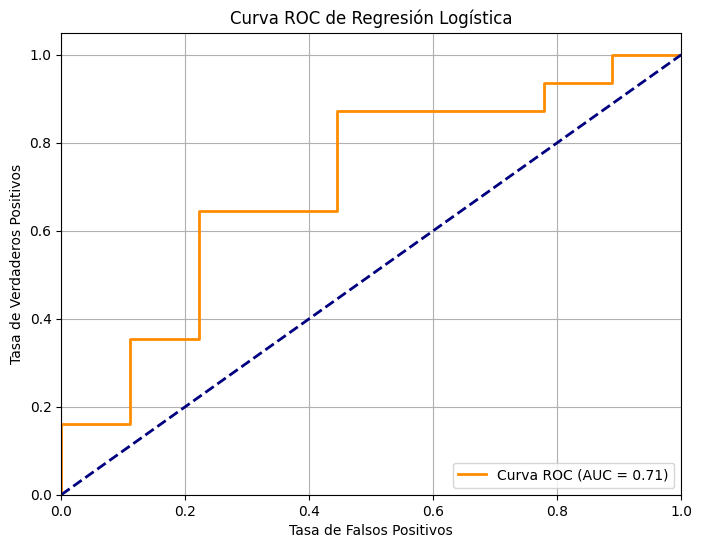

In [18]:
# Curva ROC y AUC
y_prob_test = sigmoid(np.dot(X_test_scaled, w) + b)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = roc_auc_score(y_test, y_prob_test)

print(f"\nROC AUC: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de Regresión Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')
print("Curva ROC guardada como roc_curve.png")


**Resultado de la ejecución:**

ROC AUC: 0.7061
Curva ROC guardada como roc_curve.png

**Gráfico de la Curva ROC:**

![Curva ROC](roc_curve.png)

### 5.3. Límites de Decisión

Para problemas con dos características, podemos visualizar los límites de decisión del modelo, que es la frontera que el modelo utiliza para clasificar las instancias en una u otra clase.



Límites de decisión guardados como decision_boundary.png


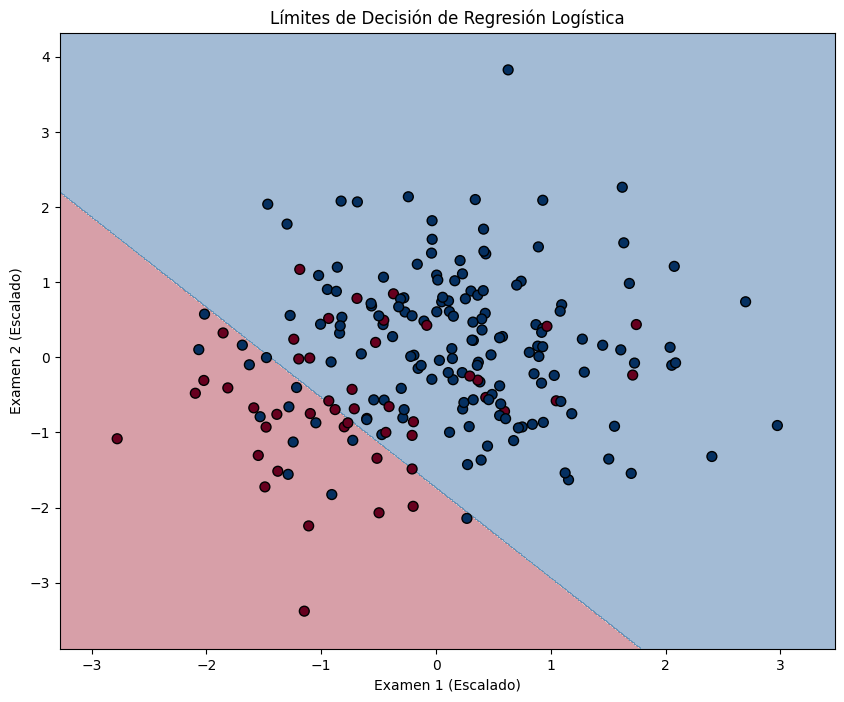

In [20]:
# Visualización de los límites de decisión (solo para 2 características)
if n_features == 2:
    plt.figure(figsize=(10, 8))

    # Crear una malla para graficar los límites de decisión
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.RdBu)
    plt.xlabel('Examen 1 (Escalado)')
    plt.ylabel('Examen 2 (Escalado)')
    plt.title('Límites de Decisión de Regresión Logística')
    plt.savefig('decision_boundary.png')
    print("Límites de decisión guardados como decision_boundary.png")
else:
    print("La visualización de los límites de decisión solo es posible para 2 características.")


**Resultado de la ejecución:**

Límites de decisión guardados como decision_boundary.png

**Gráfico de los Límites de Decisión:**

![Límites de Decisión](decision_boundary.png)

## 6. Conclusiones

Este notebook ha demostrado la implementación de la regresión logística desde cero, incluyendo la optimización con gradiente descendente. Hemos aplicado el modelo a un problema de clasificación binaria simulado (admisión universitaria) y evaluado su rendimiento utilizando métricas clave y visualizaciones. Los resultados muestran cómo el modelo aprende a separar las clases y cómo las métricas proporcionan una visión cuantitativa de su eficacia.

